In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
import matplotlib.pyplot as plt




from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report

## **Data Representation**

In [10]:
df = pd.read_csv('Churn_Modelling.csv')

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* **RowNumber**: Index of the row.
* **CustomerId**: Unique identifier for each customer.
* **Surname**: Customer's last name (may not be very useful for analysis).
* **CreditScore**: The credit score of the customer [300 : 850].
    - Poor credit: 300 to 579.
    - Fair credit: 580 to 669.
    - Good credit: 670 to 739.
    - Very good credit: 740 to 799.
    - Excellent credit: 800 to 850.
* **Geography**: Country of the customer (e.g., France, Spain).
* **Gender**: Gender of the customer (e.g., Male, Female).
* **Age**: Age of the customer.
* **Tenure**: Number of years the customer has been with the bank.
* **Balance**: Account balance of the customer.
* **NumOfProducts**: Number of products the customer has purchased.
* **HasCrCard**: Whether the customer has a credit card (1 = Yes, 0 = No).
* **IsActiveMember**: Whether the customer is an active member (1 = Yes, 0 = No).
* **EstimatedSalary**: Estimated annual salary of the customer.
* **Exited**: Whether the customer left the bank (1 = Yes, 0 = No) — this is likely the target for churn prediction.

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
df.duplicated().sum()

0

In [19]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Check Outliers Values**

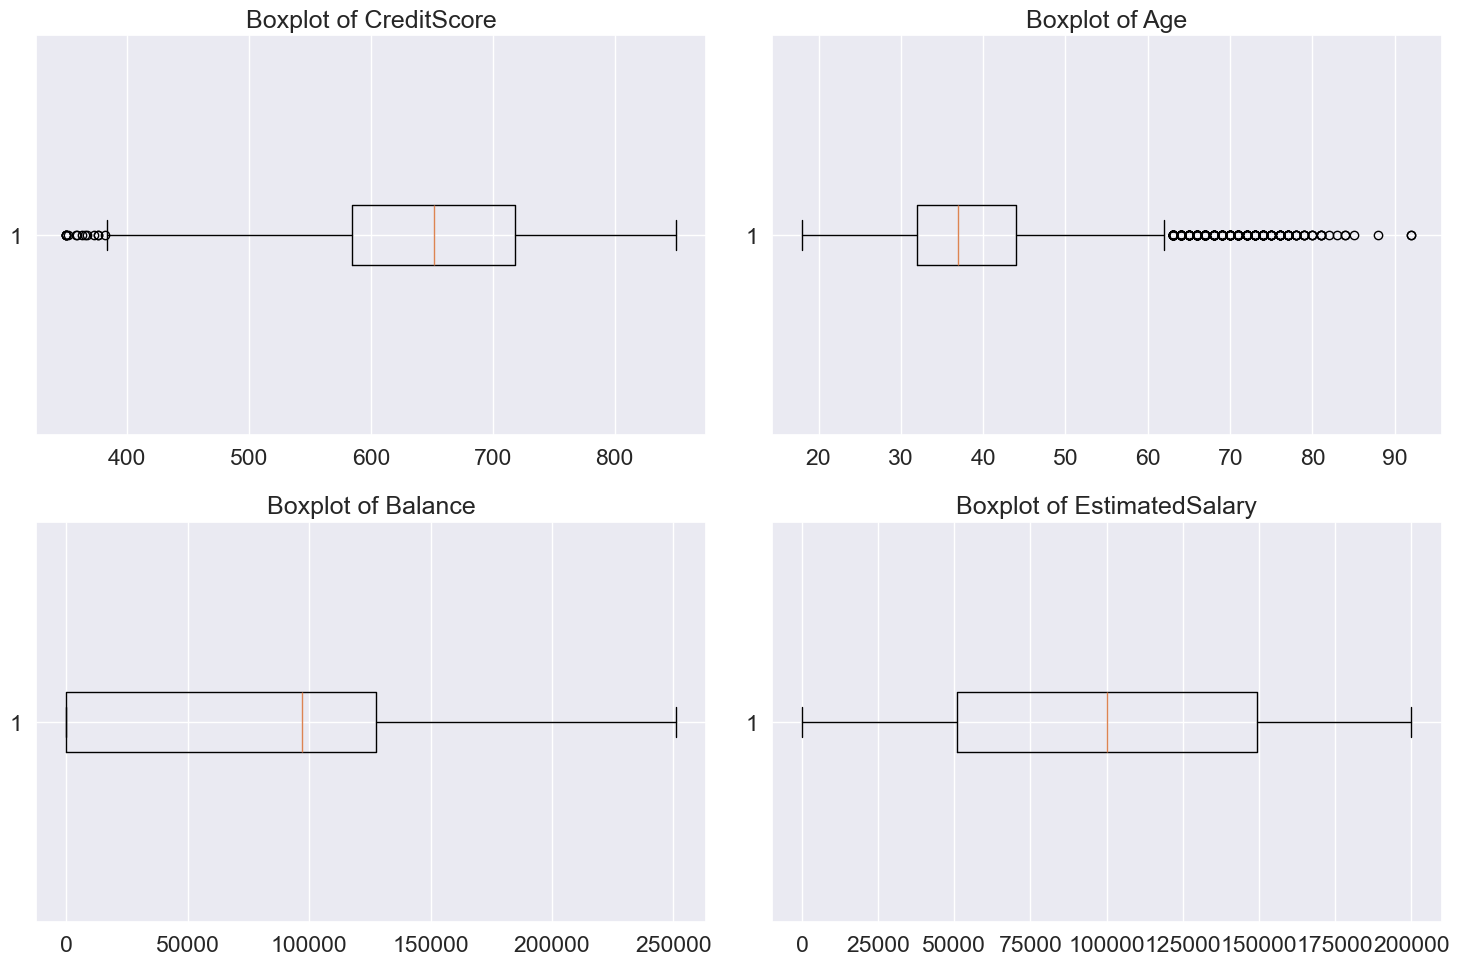

In [26]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Create box plots for each feature to visually inspect outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Boxplot of {feature}')
    
plt.tight_layout()
plt.show()

In [28]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [42]:
df.skew(numeric_only=True)

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

C:\Users\Fady\AppData\Local\Temp\ipykernel_13064\113013219.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['CreditScore'], fill=True, palette="Set2")


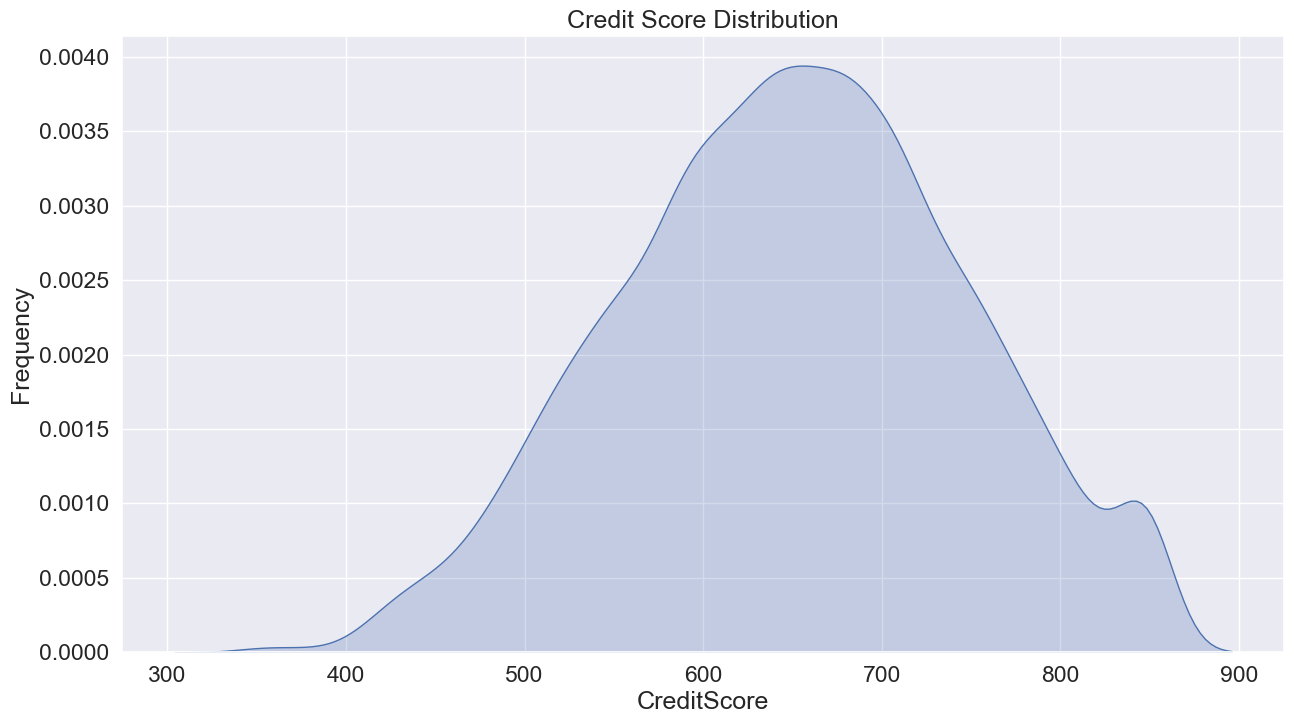

In [30]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['CreditScore'], fill=True, palette="Set2")
plt.title('Credit Score Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')

plt.show()

In [32]:
df['CreditScore'].skew()

-0.07160660820092675

In [34]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

C:\Users\Fady\AppData\Local\Temp\ipykernel_13064\230636353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="Geography",palette="Set2")


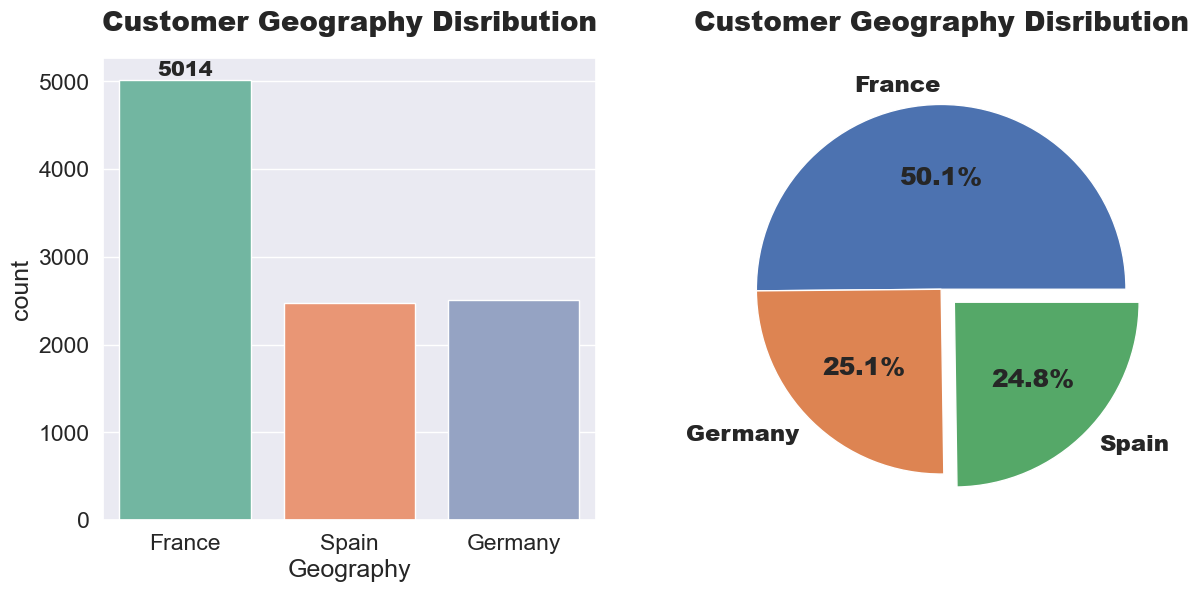

In [36]:
count = df["Geography"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Geography",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0,0.1])
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [38]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

C:\Users\Fady\AppData\Local\Temp\ipykernel_13064\749704535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="Gender",palette="Set2")


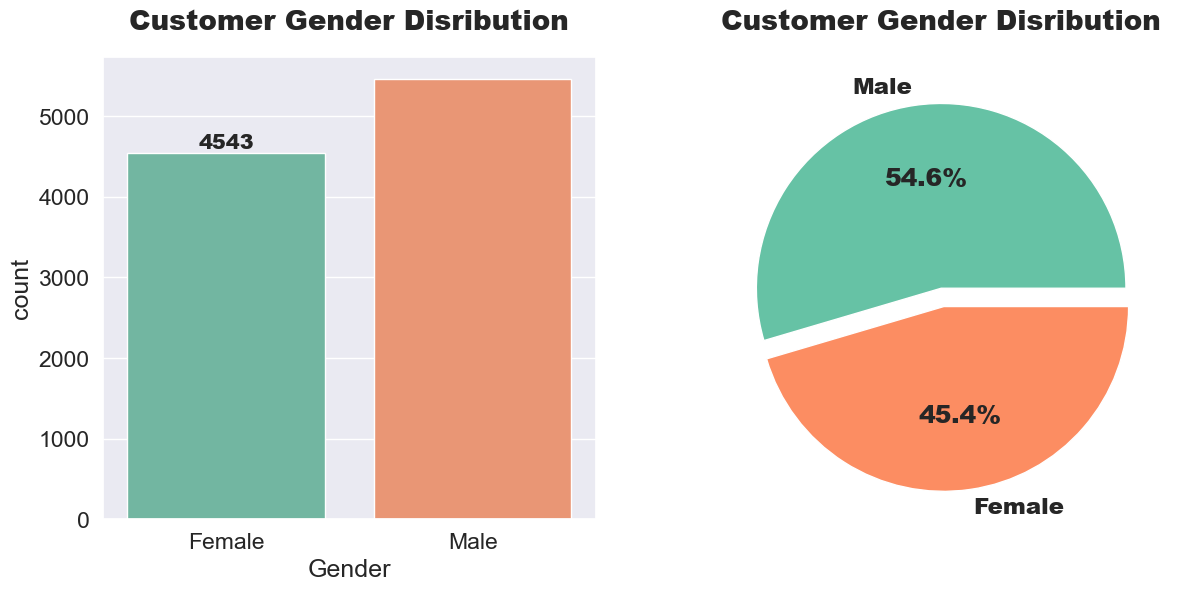

In [40]:
count = df["Gender"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Gender",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [44]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

C:\Users\Fady\AppData\Local\Temp\ipykernel_13064\2795613131.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['Age'], fill=True, palette="Set2")


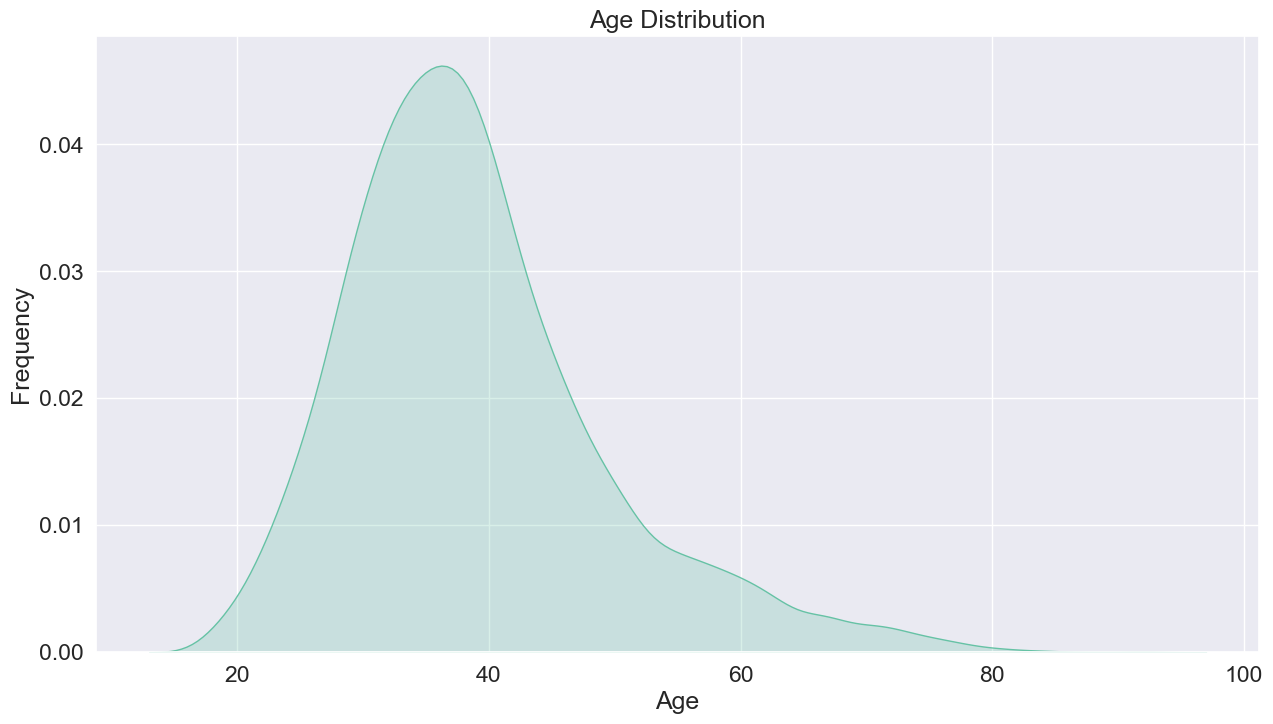

In [50]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['Age'], fill=True, palette="Set2")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [52]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

C:\Users\Fady\AppData\Local\Temp\ipykernel_13064\2199658694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="Tenure",palette="Set2")


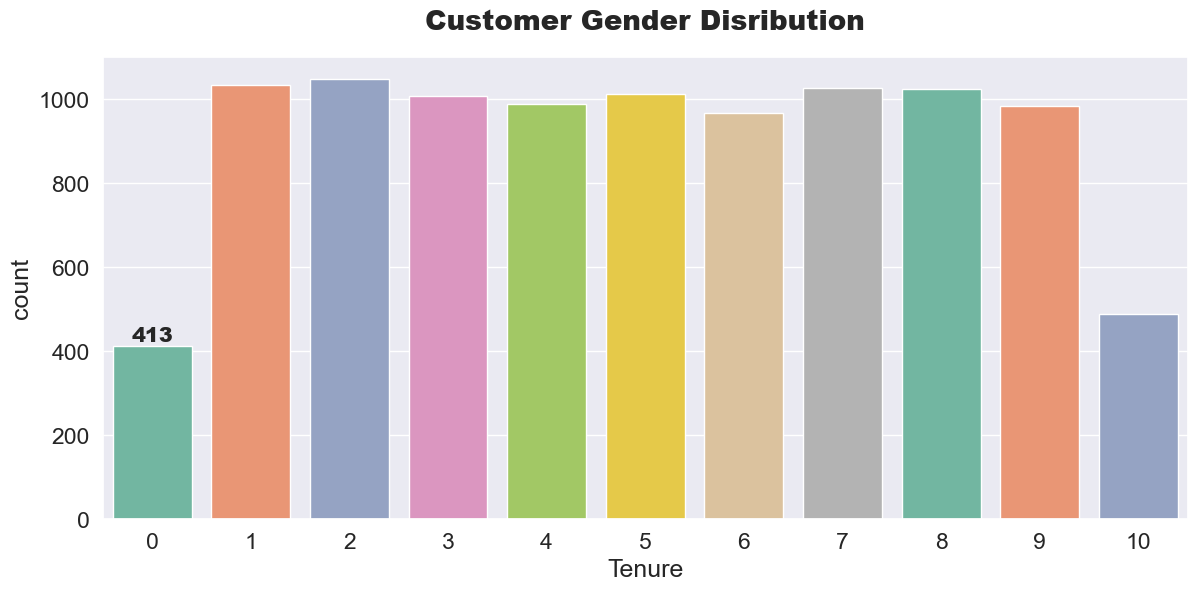

In [54]:
plt.figure(figsize=(14,6))

ax=sns.countplot(data=df, x="Tenure",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.show()

C:\Users\Fady\AppData\Local\Temp\ipykernel_13064\312011609.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['Balance'], fill=True, palette="Set2")


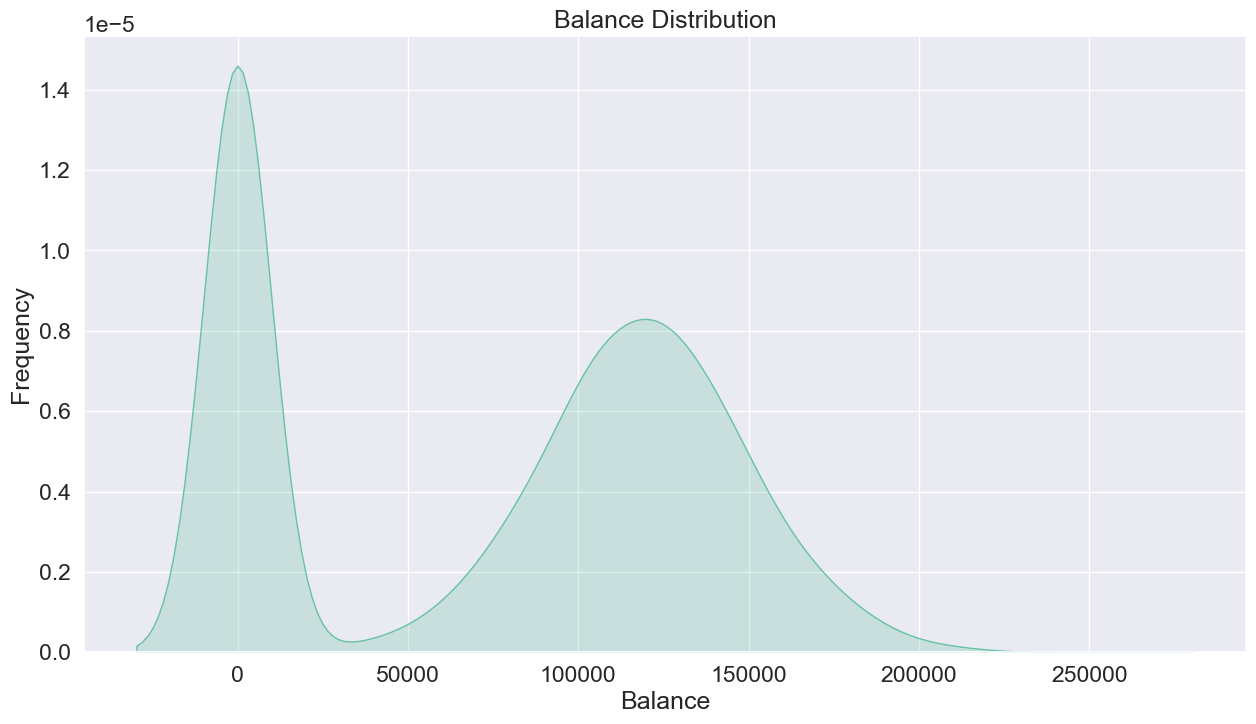

In [56]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['Balance'], fill=True, palette="Set2")
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.show()

In [58]:
df["NumOfProducts"].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

C:\Users\Fady\AppData\Local\Temp\ipykernel_13064\4259743562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="NumOfProducts",palette="Set2")


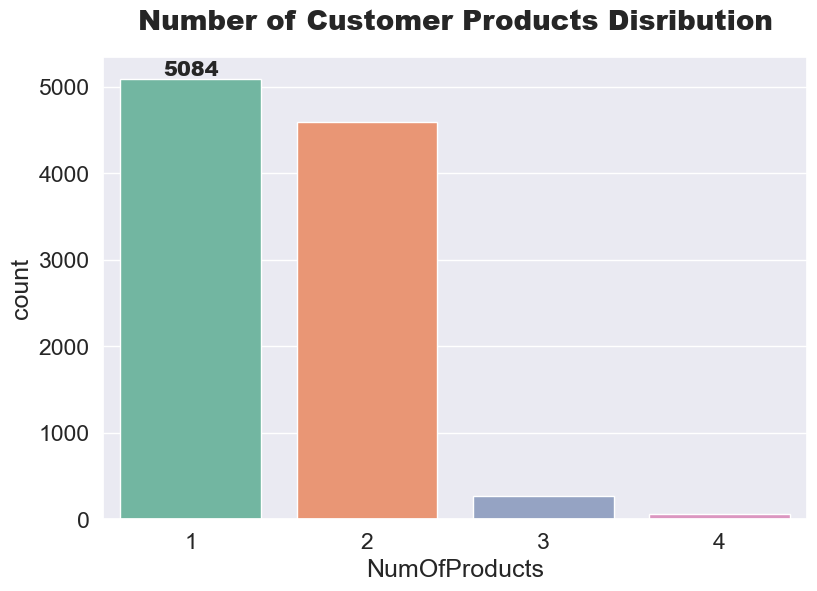

In [60]:
count = df["NumOfProducts"].value_counts()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="NumOfProducts",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Number of Customer Products Disribution",fontweight="black",size=20,pad=20)

plt.show()

In [62]:
df["HasCrCard"].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

C:\Users\Fady\AppData\Local\Temp\ipykernel_13064\634010124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="HasCrCard",palette="Set2")


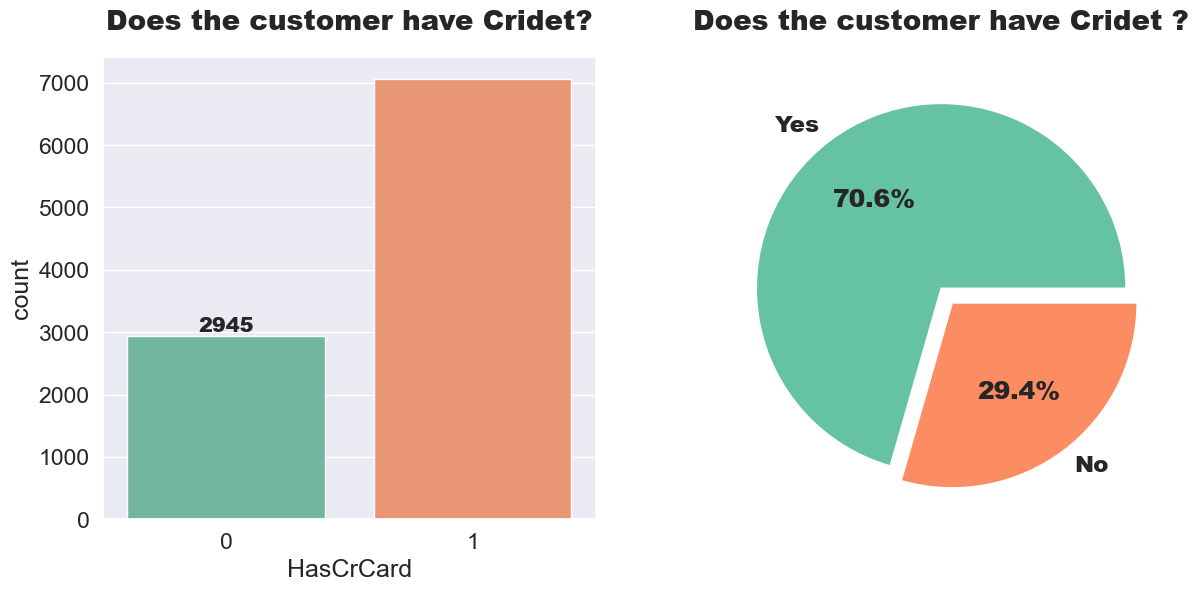

In [64]:
count = df["HasCrCard"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="HasCrCard",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Does the customer have Cridet?",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['Yes', 'No'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Does the customer have Cridet ?",fontweight="black",size=20,pad=20)
plt.show()

In [66]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

C:\Users\Fady\AppData\Local\Temp\ipykernel_13064\3026100948.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="IsActiveMember",palette="Set2")


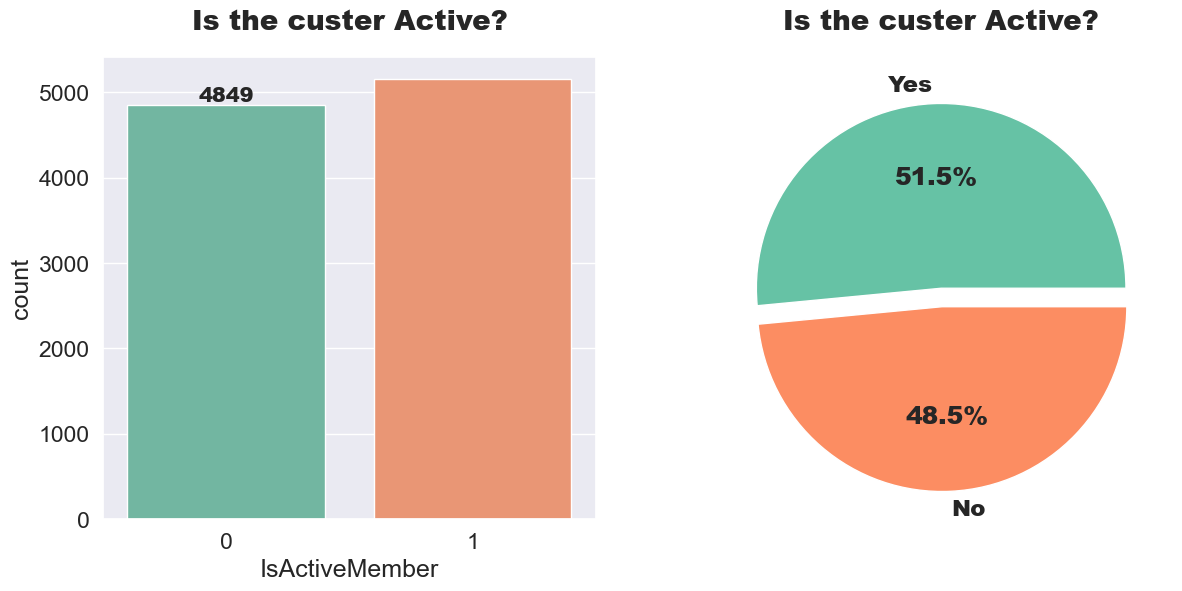

In [68]:
count = df["IsActiveMember"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="IsActiveMember",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Is the custer Active?",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['Yes', 'No'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Is the custer Active?",fontweight="black",size=20,pad=20)
plt.show()

In [70]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

C:\Users\Fady\AppData\Local\Temp\ipykernel_13064\1575628732.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['EstimatedSalary'], fill=True, palette="Set2")


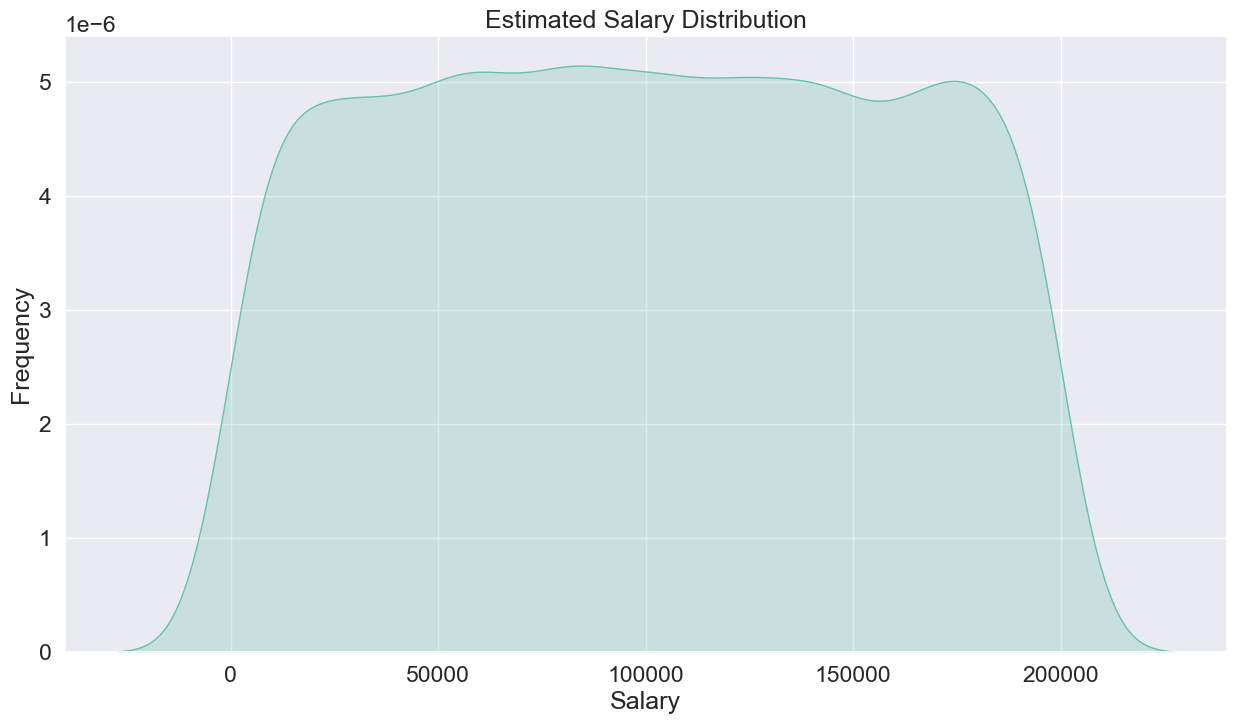

In [72]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['EstimatedSalary'], fill=True, palette="Set2")
plt.title('Estimated Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

In [74]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

C:\Users\Fady\AppData\Local\Temp\ipykernel_13064\954158872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="Exited",palette="Set2")


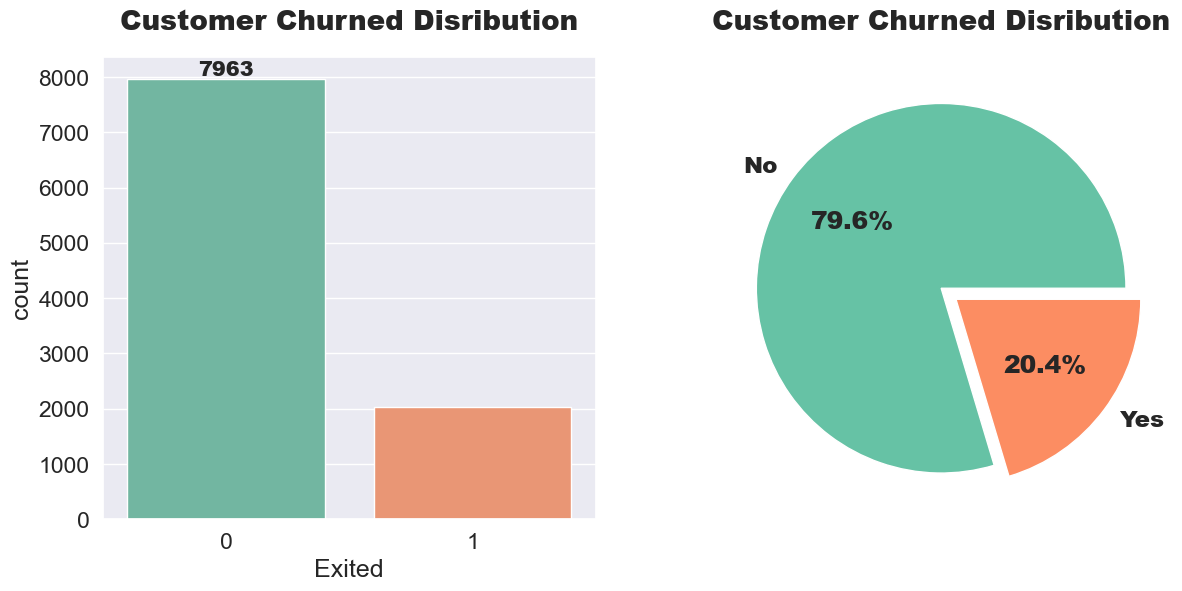

In [76]:
count = df["Exited"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Exited",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['No', 'Yes'], autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

**Numerical Features vs. Churn (Exited)**

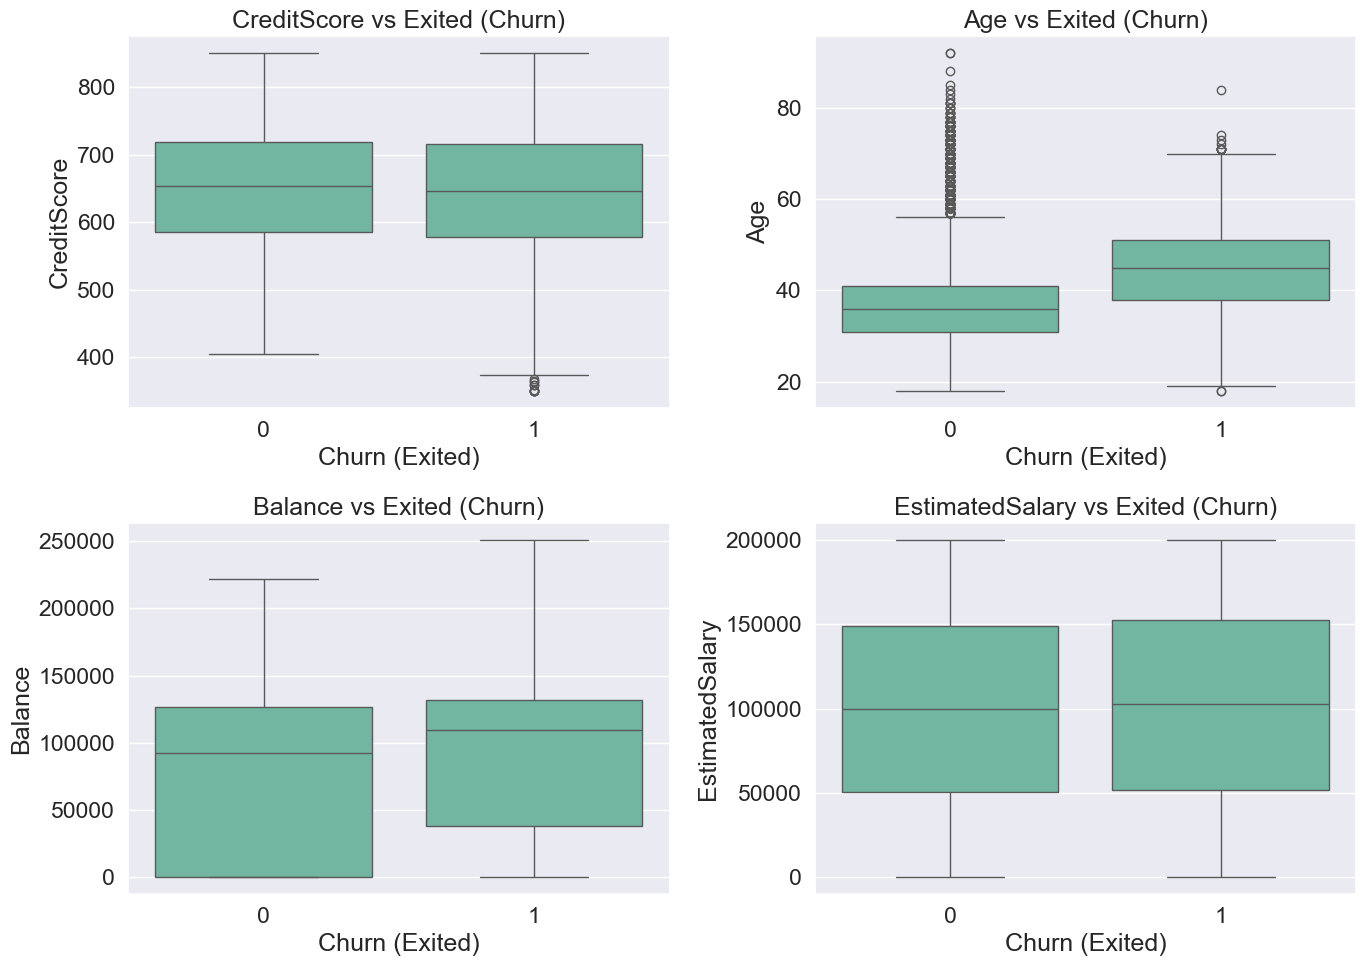

In [81]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Plotting the relationship between each numerical feature and churn (Exited)
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel('Churn (Exited)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


**Categorical Features vs. Churn (Exited)**

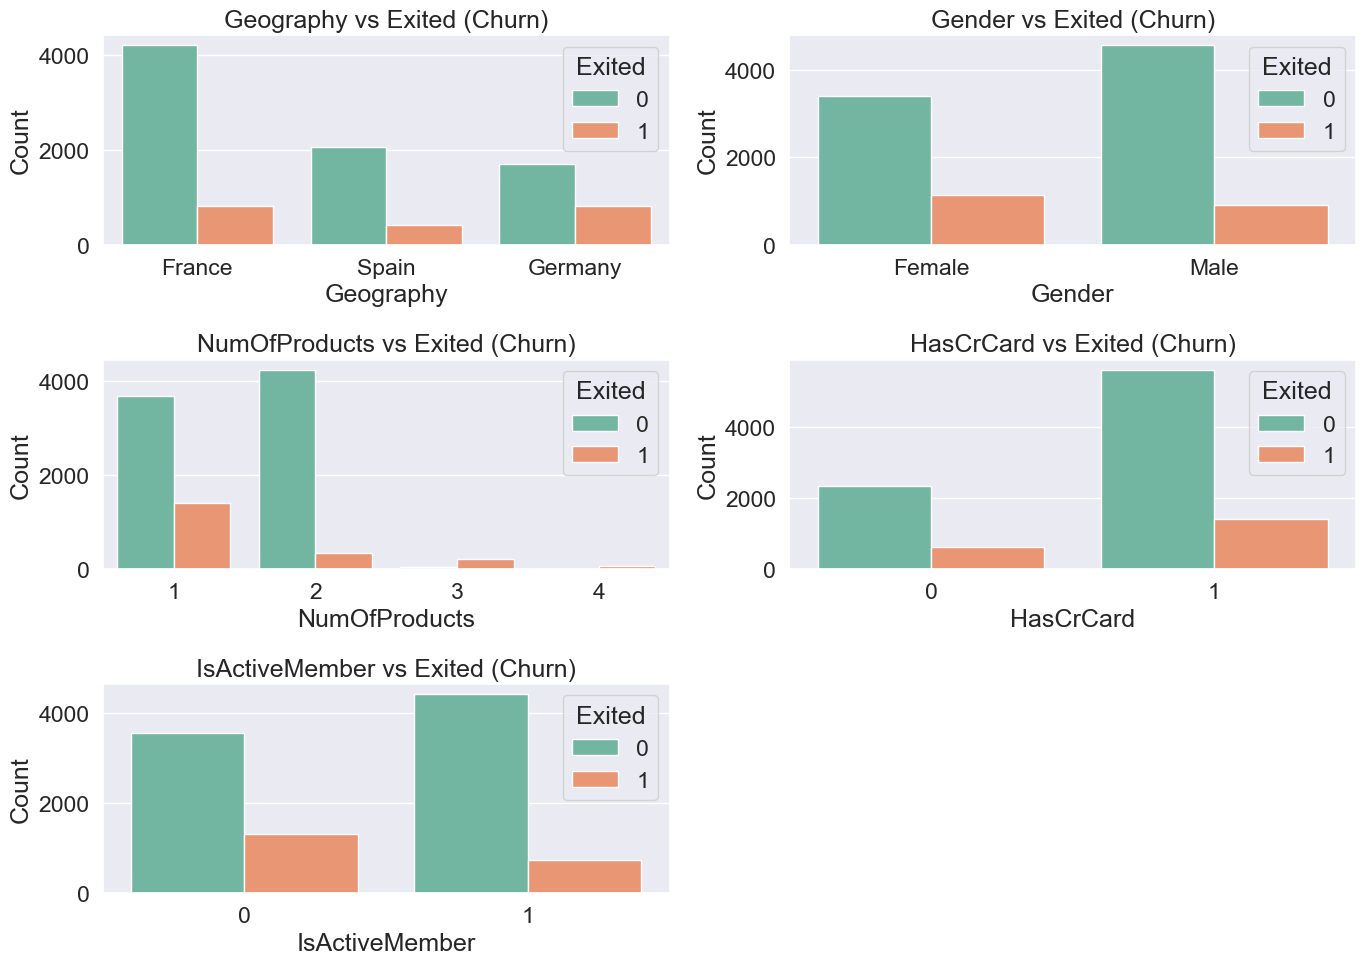

In [84]:
categorical_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Plotting the relationship between each categorical feature and churn (Exited)
plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'{feature} vs Exited (Churn)')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [86]:
df.corr(numeric_only=True)['Exited']


RowNumber         -0.016571
CustomerId        -0.006248
CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

**corr**

C:\Users\Fady\AppData\Local\Temp\ipykernel_13064\2635715774.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=correlations, x='Feature', y='Correlation', palette="Set2")


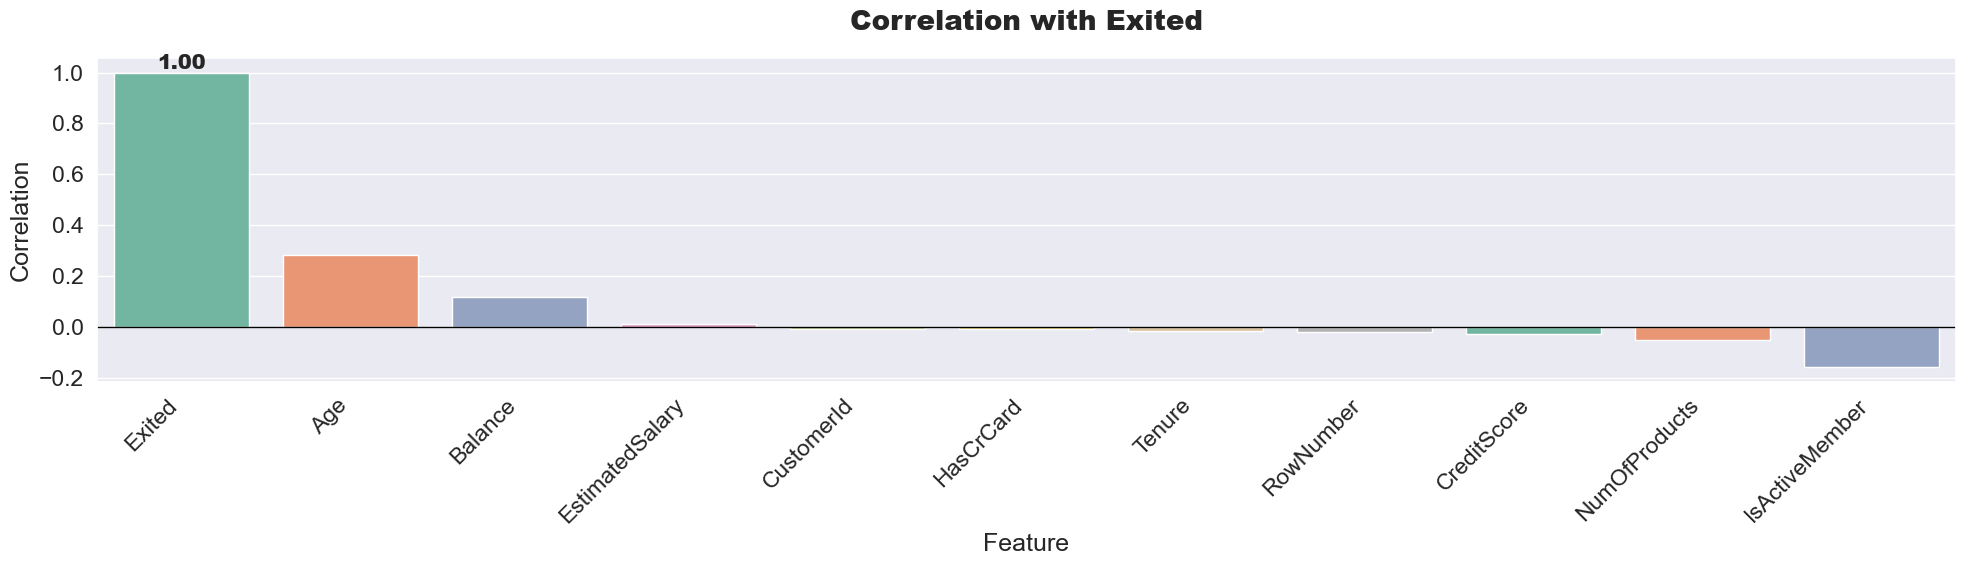

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns


correlations = df.corr(numeric_only=True)['Exited'].sort_values(ascending=False).reset_index()
correlations.columns = ['Feature', 'Correlation']

plt.figure(figsize=(20,6))
ax = sns.barplot(data=correlations, x='Feature', y='Correlation', palette="Set2")


ax.bar_label(ax.containers[0], fontweight="black", size=15, fmt="%.2f")

plt.title("Correlation with Exited", fontweight="black", size=20, pad=20)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()


## **Data Preprocessing**

In [100]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [102]:
x=df['Exited']
x = df.drop(columns=['Exited'])


In [106]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [110]:
x = pd.get_dummies(x, columns=['Geography', 'Gender'], drop_first=False)

In [112]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [118]:
scaler = StandardScaler()


numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

In [120]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,True,False,False,True,False
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,False,False,True,True,False
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,True,False,False,True,False
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,True,False,False,True,False
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,False,False,True,True,False


In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Machine Learning Models**

**naive**

In [133]:
listt=[]

for i in range(x.shape[0]) :
    listt.append(1)
listt=pd.Series(listt)
print("the accuracy of naive is",accuracy_score(listt,y)*100)

the accuracy of naive is 20.369999999999997


In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



from sklearn.metrics import accuracy_score

model1 = DecisionTreeClassifier()
model2 = SVC()
model3 = AdaBoostClassifier()
model4 = LogisticRegression(max_iter=200)
model5 = RandomForestClassifier(random_state=42)


model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)
model5.fit(x_train, y_train)


train_pred1 = model1.predict(x_train)
train_pred2 = model2.predict(x_train)
train_pred3 = model3.predict(x_train)
train_pred4 = model4.predict(x_train)
train_pred5 = model5.predict(x_train)


train_acc1 = accuracy_score(y_train, train_pred1)
train_acc2 = accuracy_score(y_train, train_pred2)
train_acc3 = accuracy_score(y_train, train_pred3)
train_acc4 = accuracy_score(y_train, train_pred4)
train_acc5 = accuracy_score(y_train, train_pred5)


print(f"Training Accuracy (DecisionTree)      : {train_acc1*100:.2f}%")
print(f"Training Accuracy (SVC)               : {train_acc2*100:.2f}%")
print(f"Training Accuracy (AdaBoost)          : {train_acc3*100:.2f}%")
print(f"Training Accuracy (LogisticRegression): {train_acc4*100:.2f}%")
print(f"Training Accuracy (RandomForest)      : {train_acc5*100:.2f}%")



C:\Users\Fady\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy (DecisionTree)      : 100.00%
Training Accuracy (SVC)               : 86.21%
Training Accuracy (AdaBoost)          : 85.81%
Training Accuracy (LogisticRegression): 81.12%
Training Accuracy (RandomForest)      : 100.00%


In [154]:

test_pred1 = model1.predict(x_test)
test_pred2 = model2.predict(x_test)
test_pred3 = model3.predict(x_test)
test_pred4 = model4.predict(x_test)
test_pred5 = model5.predict(x_test)


test_acc1 = accuracy_score(y_test, test_pred1)
test_acc2 = accuracy_score(y_test, test_pred2)
test_acc3 = accuracy_score(y_test, test_pred3)
test_acc4 = accuracy_score(y_test, test_pred4)
test_acc5 = accuracy_score(y_test, test_pred5)


print(f"Testing Accuracy (DecisionTree)      : {test_acc1*100:.2f}%")
print(f"Testing Accuracy (SVC)               : {test_acc2*100:.2f}%")
print(f"Testing Accuracy (AdaBoost)          : {test_acc3*100:.2f}%")
print(f"Testing Accuracy (LogisticRegression): {test_acc4*100:.2f}%")
print(f"Testing Accuracy (RandomForest)      : {test_acc5*100:.2f}%")


Testing Accuracy (DecisionTree)      : 77.25%
Testing Accuracy (SVC)               : 85.25%
Testing Accuracy (AdaBoost)          : 85.75%
Testing Accuracy (LogisticRegression): 81.10%
Testing Accuracy (RandomForest)      : 86.40%


**save model**

In [157]:
 import pickle

with open("model2.pkl", "wb") as f:
    pickle.dump(model1, f)

print("model2 saved as model2.pkl")

model2 saved as model2.pkl
